In [81]:
import numpy as np
import pylab as mplot
%pylab inline
import astropy.io.fits as pf
import h5py

mplot.rc('text', usetex=False)
mplot.rc('font', family='serif')

Populating the interactive namespace from numpy and matplotlib


In [82]:
# input photometry catalog to TXPipe
input_cat = h5py.File('test_photometry.hdf', 'r')
mag_u = input_cat['photometry/mag_true_u_lsst']
mag_g = input_cat['photometry/mag_true_g_lsst']
mag_r = input_cat['photometry/mag_true_r_lsst']
mag_i = input_cat['photometry/mag_true_i_lsst']
mag_z = input_cat['photometry/mag_true_z_lsst']
mag_y = input_cat['photometry/mag_true_y_lsst']
redshift = input_cat['photometry/redshift_true']

# output PZ catalog from TXPipe
pz_cat = h5py.File('photoz_pdfs.hdf5', 'r')

# output stacked n(z) catalog from TXPipe
pz_stack = h5py.File('photoz_stack.hdf5', 'r')

# output tomography catalog from TXPipe
tom_cat = h5py.File('tomography_catalog.hdf5', 'r')
source_bin = tom_cat['tomography/source_bin'].value
lens_bin = tom_cat['tomography/lens_bin'].value

### First examine some individual PDFs

(0, 0.2)

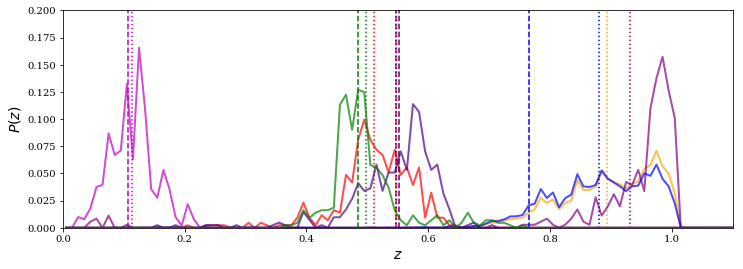

In [63]:
mplot.figure(figsize=(12,4))
color= ['orange','r','m', 'purple', 'blue', 'indigo', 'g']
ids = np.arange(len(redshift))
np.random.seed(500)
for i in range(7):
    np.random.shuffle(ids)
    mplot.plot(pz_cat['pdf/z'].value, pz_cat['pdf/pdf'].value[ids[0]], color=color[i], alpha=0.7, lw=2)
    ztrue = redshift[ids[0]]
    zmean = pz_cat['pdf/mu'].value[ids[0]]

    mplot.plot([ztrue,ztrue], [0,0.5], color=color[i], ls='--')
    mplot.plot([zmean,zmean], [0,0.5], color=color[i], ls=':')

mplot.xlabel('$z$', fontsize=14)
mplot.ylabel('$P(z)$', fontsize=14)
mplot.xlim(0,1.1)
mplot.ylim(0,0.2)

### Next examine scatter plot of z true vs. z mean

Text(0.5, 1.0, 'g-r')

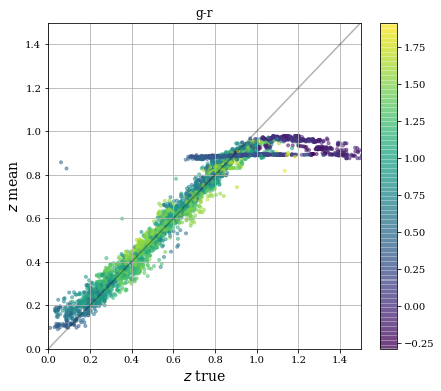

In [61]:
gr = mag_g.value - mag_r.value

mplot.figure(figsize=(7,6))
mplot.scatter(redshift.value[ids[:5000]], pz_cat['pdf/mu'].value[ids[:5000]], marker='.', alpha=0.5, c=gr[ids[:5000]])
mplot.plot([0,1.5],[0,1.5], color='k', alpha=0.3)
mplot.colorbar()
mplot.xlim(0,1.5)
mplot.ylim(0,1.5)
mplot.grid()
mplot.xlabel('$z$ true', fontsize=14)
mplot.ylabel('$z$ mean', fontsize=14)
mplot.title('g-r')

### Next examine stacked source P(z)

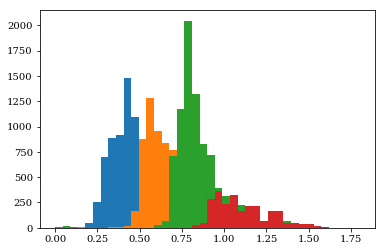

In [113]:
hist = []
for i in range(4):
    hist.append(mplot.hist(redshift.value[source_bin==i], bins=40, range=(0,1.8)))

Text(0.5, 1.0, 'Source')

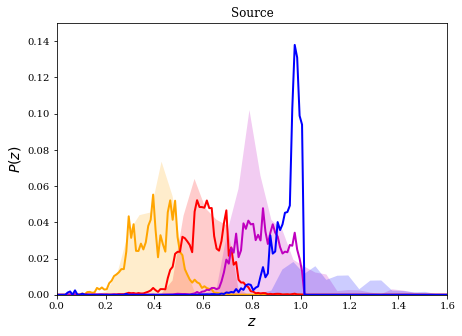

In [125]:
mplot.figure(figsize=(7,5))
color= ['orange','r','m', 'blue', 'indigo', 'g']

for i in range(4):
    mplot.plot(pz_stack['n_of_z/lens/z'].value, pz_stack['n_of_z/source/bin_'+str(i)].value, color=color[i], lw=2)
    mplot.xlabel('$z$', fontsize=14)
    mplot.fill_between((hist[i][1][1:]+hist[i][1][:-1])/2, np.zeros(40), hist[i][0]/20000, color=color[i], alpha=0.2, lw=0)
mplot.ylabel('$P(z)$', fontsize=14)
mplot.xlim(0,1.6)
mplot.ylim(0,0.15)
mplot.title('Source')

### Comments:

* will be good to have some truth information in the TXPipe intput catalog (ie. redshift), or even ids if we want to match afterwards
* should do the same exercise on the image-level photometry, is that easily matched to true?
* what is the training set? how does it explain these results?
* what is the thing at 0.9?
* things basically work, now we can think about more tests to do with the photo-z's!